# PLC - Project 3 - Joey Arato

In [1]:
%load_ext nb_black

# Supress deprecation notes and / or warning
import warnings

warnings.filterwarnings("ignore")

# Data manipulation libraries

import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data split libraries
from sklearn.model_selection import train_test_split

# Build Prediction Model
from sklearn.linear_model import LogisticRegression

# Libraries to help the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Model Tunning libraries
from sklearn.model_selection import GridSearchCV

# Libraries to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Problem Statement

AllLife Bank currently has a large number of deposit only customers. They would like to build their business in the personal loans area. An earlier campaign had a successful conversion rate of 9%. We will look at what we can do build upon the early successs through a more targeted campaign.

## Business Insights & Objectives

1) To predict whether a liability customer will buy a personal loan or not.
    - Through decision tree Pre & Post pruning we can predict with 98% accuracy and an 86% precision we can predict if a customer will take out a personal loan or not
2) Which variables are most significant.
    - Education, Income and Family are our most significant variables
    - Experience, Zip Code, Securities Account, Online and CCd are our least important variables
3) Which segment of customers should be targeted more. 
    - Higher educated people with a larger income and family are more likely to become borrowers and are the audience we should target

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
print("The data set includes: ")
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

The data set includes: 
Rows: 5000
Columns: 14


<IPython.core.display.Javascript object>

In [4]:
data.sample(n=10, random_state=1)  # view a random sample of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
df = data  # copy data into a new data frame so as not to inadvertantly change the orginal data set

<IPython.core.display.Javascript object>

In [6]:
df.info()  # review the basic info on the data set, looks like we have several objects lets see if we can reclaim some memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [7]:
df.describe().T  #   Lets get a look at the numerical data stats

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

In [8]:
df.duplicated().sum()  # check for duplicate values

0

<IPython.core.display.Javascript object>

## EDA, Data Pre-Procesing & Feature Engineering

In [9]:
df.drop(
    "ID", axis=1, inplace=True
)  # The ID Column matches the index so droping the column

<IPython.core.display.Javascript object>

In [10]:
df.isnull().sum()  # Check for missing values

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [65]:
count_columns = [
    "Age",
    "Experience",
    "Income",
    "Family",
    "Education",
]  # Lets take a look at the values in these rows
for i in count_columns:
    print(df[i].value_counts())
    print("*" * 50)

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
55    125
31    125
40    125
62    123
61    122
44    121
33    120
29    120
32    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    102
27     91
65     80
64     78
26     77
25     35
66     24
67     12
24     11
Name: Age, dtype: int64
**************************************************
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
34    125
27    125
17    125
29    124
22    124
7     121
8     119
15    119
6     119
10    118
33    117
13    117
37    116
11    116
36    114
4     113
21    113
31    104
12    102
38     88
39     85
2      85
1      74
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64
**************

<IPython.core.display.Javascript object>

Roughly 1% of the data set has bad numbers in experience. Lets look at these rows.

In [12]:
df.loc[df["Experience"] == -3]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2618,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
3626,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
4285,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
4514,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [13]:
df.loc[df["Experience"] == -2]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
315,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
597,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1
793,24,-2,150,94720,2,2.00,1,0,0,0,0,1,0
889,24,-2,82,91103,2,1.60,3,0,0,0,0,1,1
2466,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0
2717,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
2876,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0
2962,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0
3130,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1


<IPython.core.display.Javascript object>

In [14]:
df.loc[df["Experience"] == -1]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
524,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
649,25,-1,82,92677,4,2.10,3,0,0,0,0,1,0
670,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0
686,24,-1,38,92612,4,0.60,2,0,0,0,0,1,0


<IPython.core.display.Javascript object>

Since this is just 1% of the data set and these lines dont have enough context to change the data im going to delete these lines

In [15]:
df.drop(
    df[df.Experience < 0].index, inplace=True
)  # Dropping all rows in Experience where the value is less than 0

<IPython.core.display.Javascript object>

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.0,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.0,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.0,224.0
ZIPCode,4948.0,93168.503436,1761.076366,90005.0,91911.00,93437.0,94608.0,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.0,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.6,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.0,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.0,635.0
Personal_Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.0,1.0
Securities_Account,4948.0,0.104285,0.305660,0.0,0.00,0.0,0.0,1.0


<IPython.core.display.Javascript object>

In [17]:
df.sort_values(by=["Income"], ascending=False).head(5)  # checking income for outliers

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2278,30,4,204,91107,2,4.50,1,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [18]:
# Repeatable funtion to make boxplots and histograms at the same scale


def hist_box(data, feature, size=(10, 5), kde=True, bins=None):
    f2, (box, hist) = plt.subplots(
        nrows=2, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=size,
    )
    sns.boxplot(data=data, x=feature, ax=box, showmeans=True, color="green")
    sns.histplot(
        data=data, x=feature, kde=kde, ax=hist, bins=bins, palette="winter"
    ) if bins else sns.histplot(data=data, x=feature, kde=kde, ax=hist)

<IPython.core.display.Javascript object>

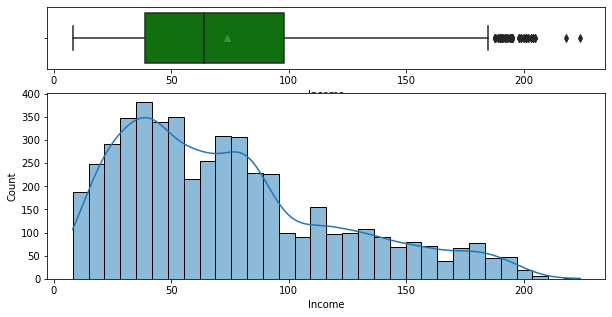

<IPython.core.display.Javascript object>

In [19]:
hist_box(df, "Income", kde=True)

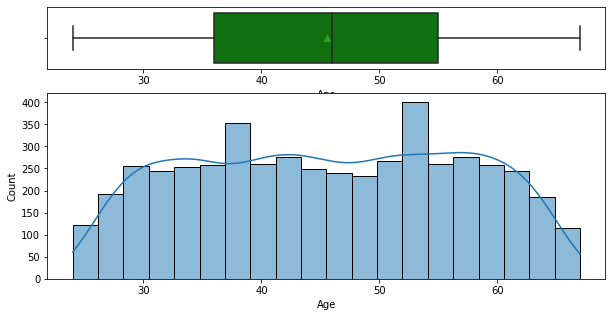

<IPython.core.display.Javascript object>

In [20]:
hist_box(df, "Age", kde=True)

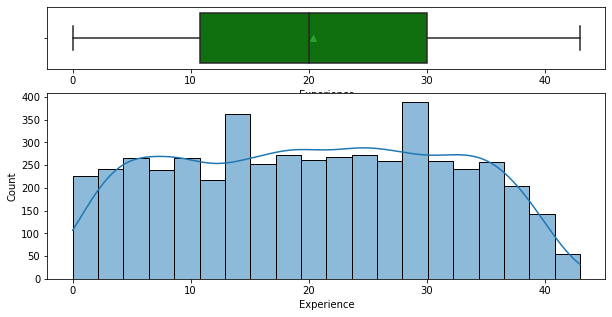

<IPython.core.display.Javascript object>

In [21]:
hist_box(df, "Experience", kde=True)

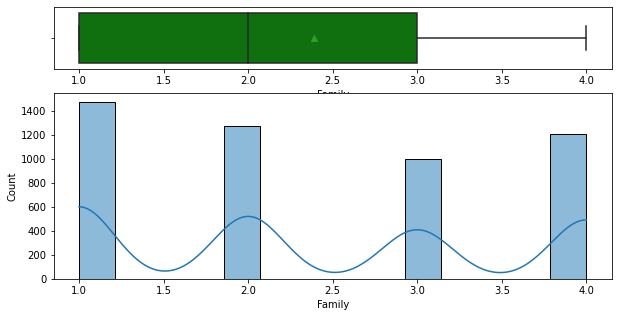

<IPython.core.display.Javascript object>

In [22]:
hist_box(df, "Family", kde=True)

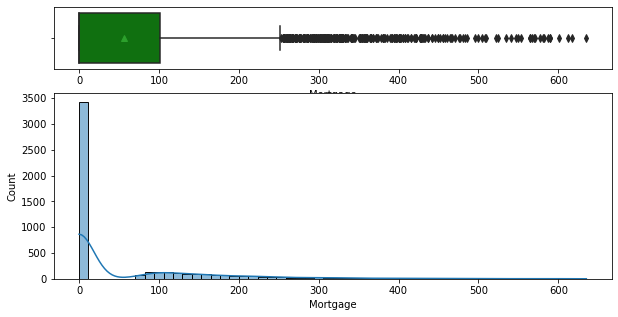

<IPython.core.display.Javascript object>

In [23]:
hist_box(df, "Mortgage", kde=True)

In [24]:
df.groupby(by="Mortgage").size()

Mortgage
0      3422
75        8
76       12
77        4
78       15
       ... 
590       1
601       1
612       1
617       1
635       1
Length: 347, dtype: int64

<IPython.core.display.Javascript object>

Nearly 75% of the data set doesnt have a mortgage. This might not be a good variable to use for this use case. Will consider cutting it out later even thought it might be a good data point for some things

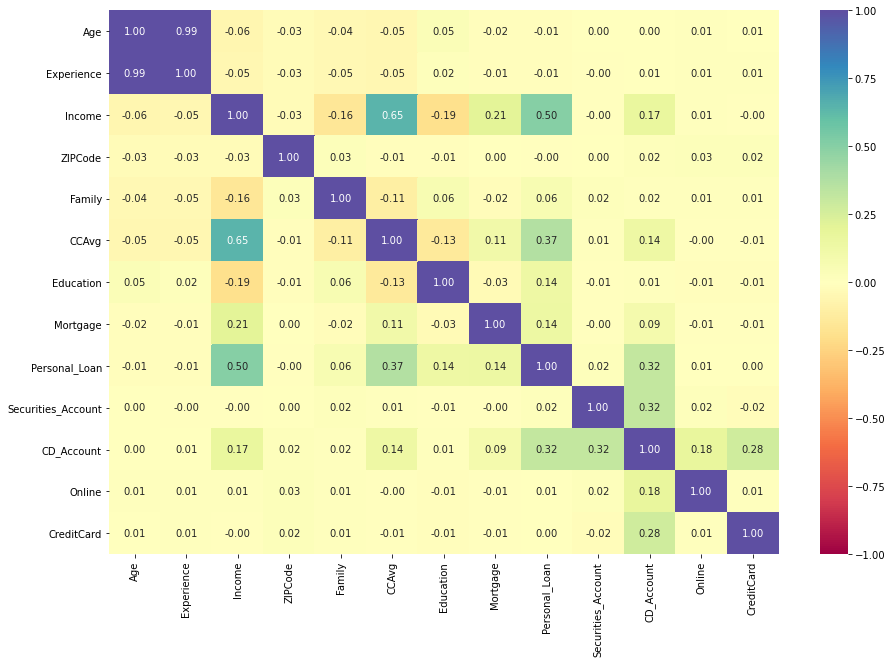

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [26]:
df.corr()  # Lets look at correlations a different way

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994101,-0.058006,-0.030790,-0.039279,-0.050879,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,0.994101,1.000000,-0.049245,-0.030525,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.058006,-0.049245,1.000000,-0.029076,-0.155666,0.646178,-0.187992,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
ZIPCode,-0.030790,-0.030525,-0.029076,1.000000,0.026883,-0.010614,-0.008165,0.004632,-0.002848,0.001013,0.021881,0.031030,0.023778
Family,-0.039279,-0.045610,-0.155666,0.026883,1.000000,-0.107230,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.050879,-0.048939,0.646178,-0.010614,-0.107230,1.000000,-0.133939,0.109905,0.369388,0.012477,0.137587,-0.003476,-0.007377
Education,0.046222,0.018243,-0.187992,-0.008165,0.064032,-0.133939,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.015184,-0.013459,0.206921,0.004632,-0.020419,0.109905,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal_Loan,-0.014204,-0.014121,0.504228,-0.002848,0.063088,0.369388,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776
Securities_Account,0.000496,-0.000457,-0.002327,0.001013,0.020155,0.012477,-0.007508,-0.003717,0.022216,1.000000,0.319056,0.016101,-0.017030


<IPython.core.display.Javascript object>

We can see high correlations between age and experience and moderate correlations between income and CCAve, as well as, income and Personal_loans. Income might help us provide strong signal on who would take out a per

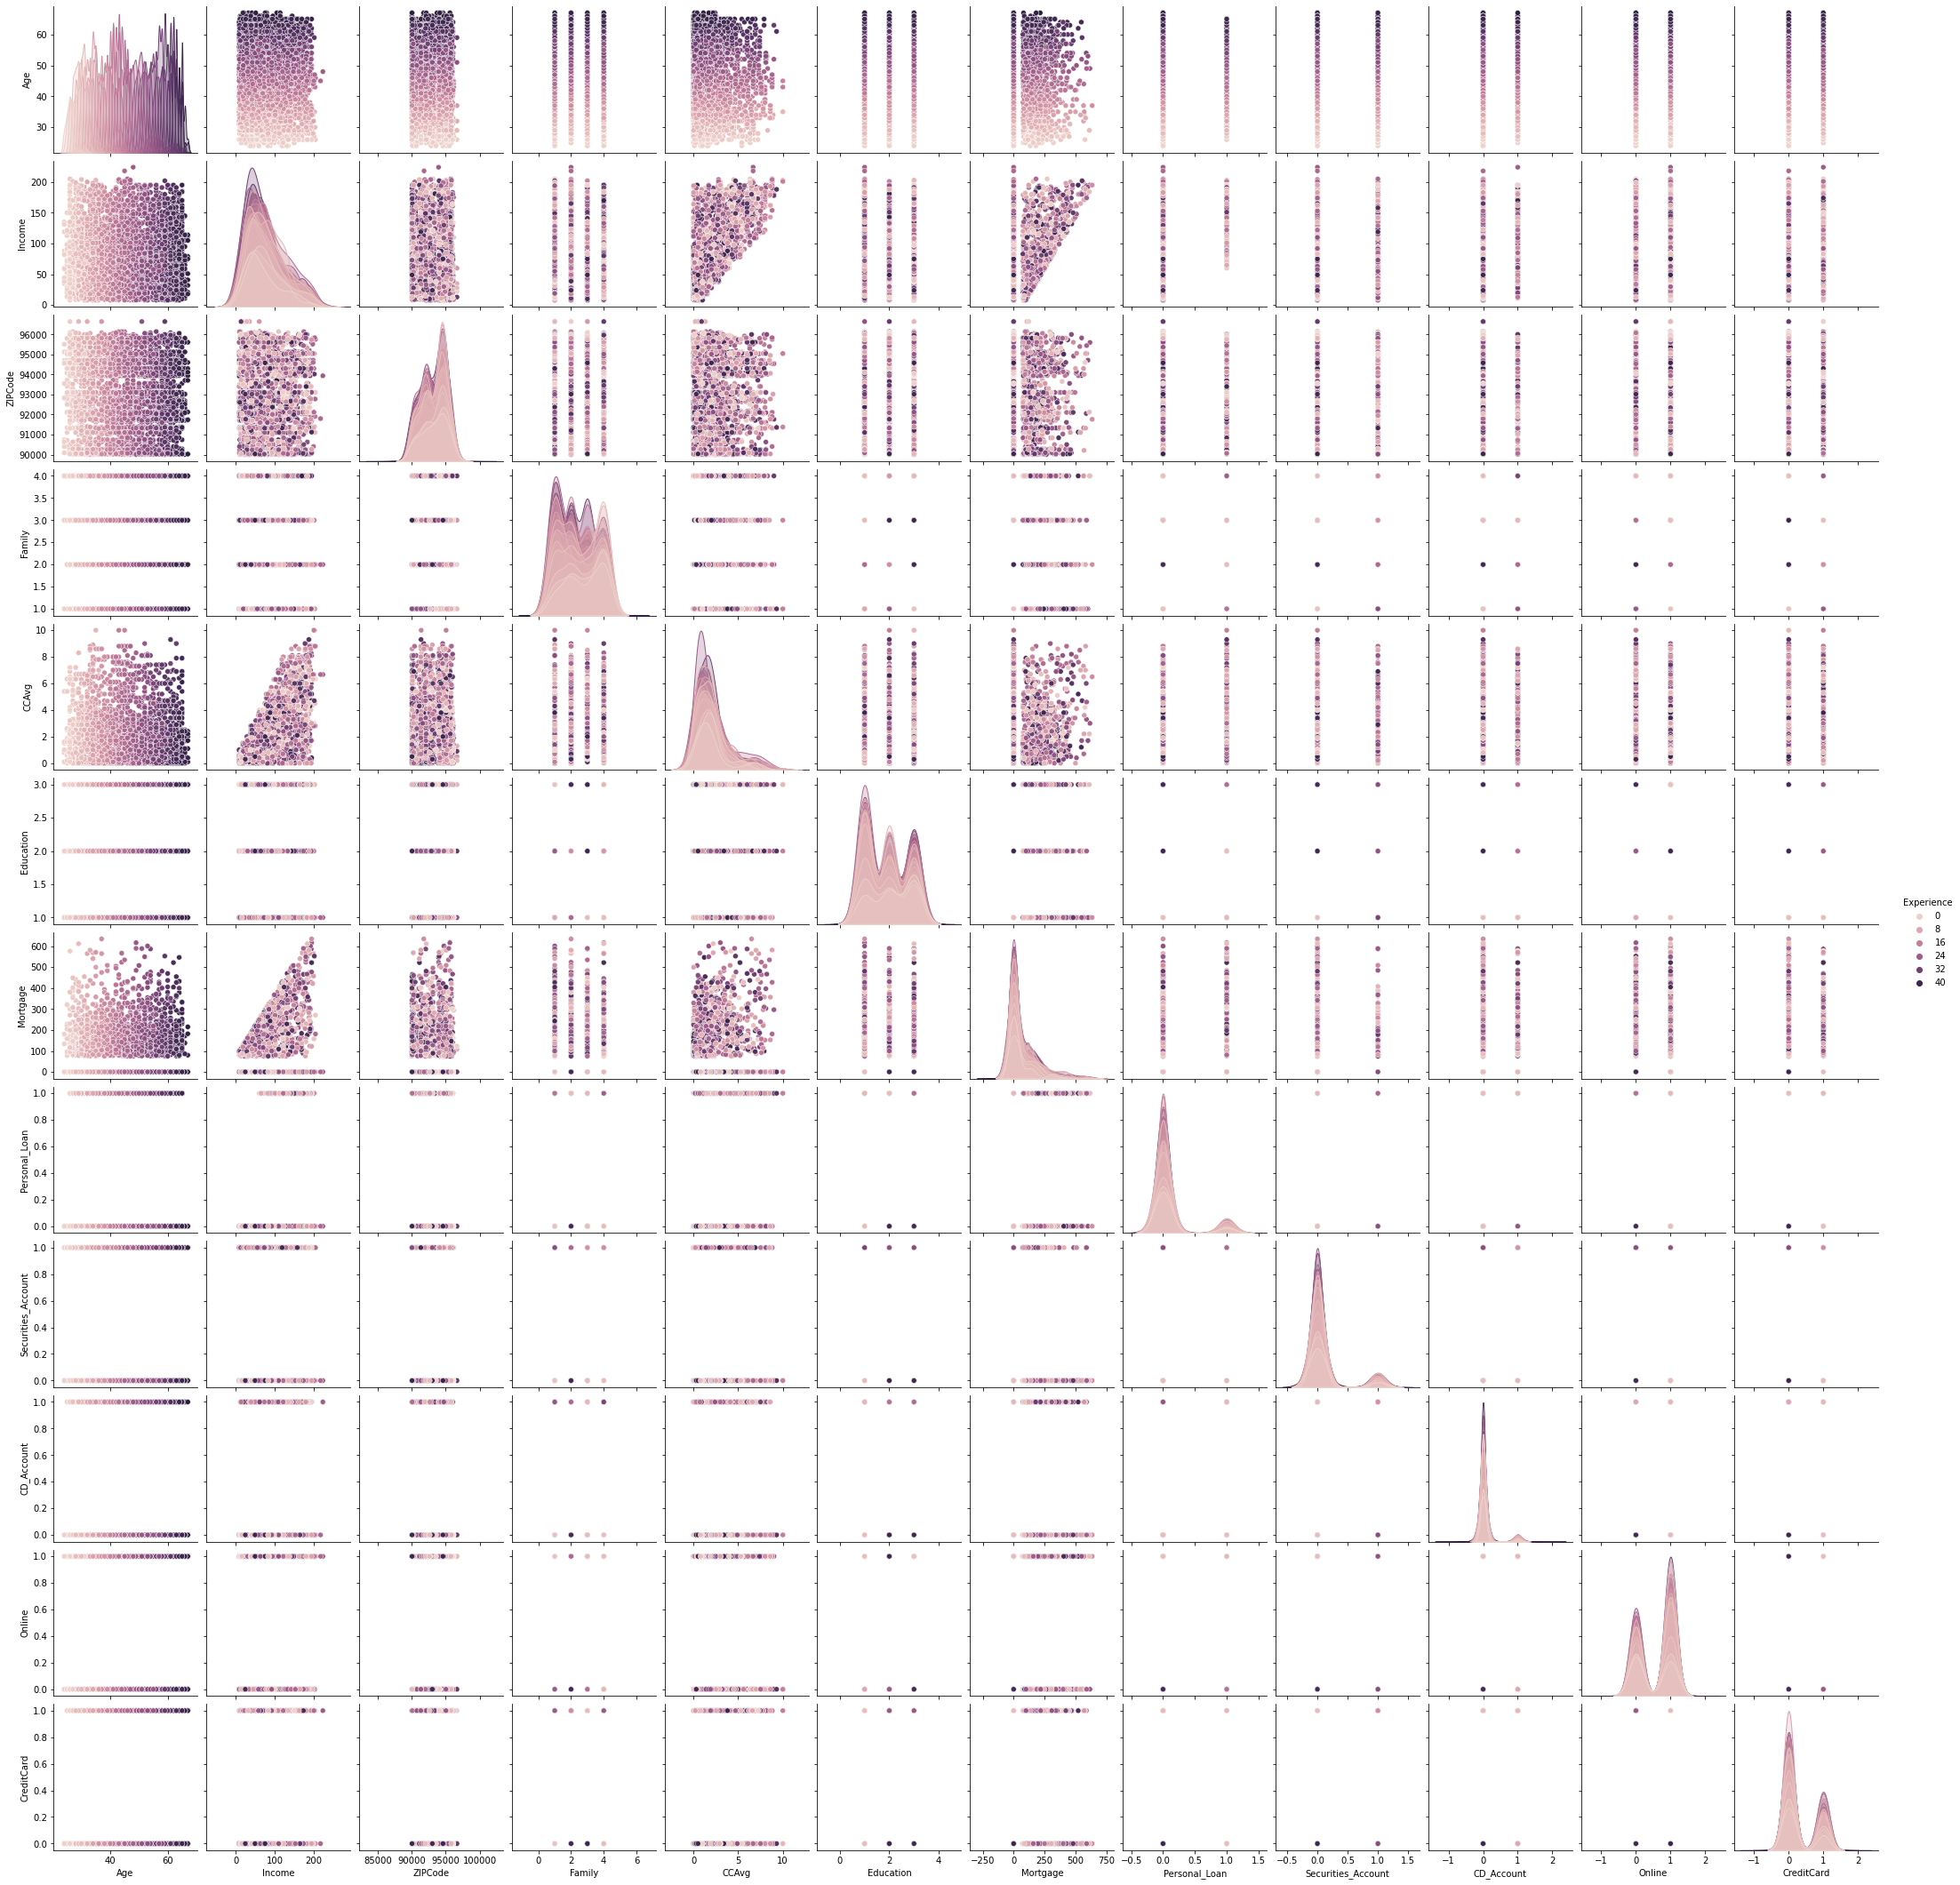

<IPython.core.display.Javascript object>

In [27]:
sns.pairplot(data=df, hue="Experience")
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'ZIPCode'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Mortgage'}>],
       [<AxesSubplot:title={'center':'Personal_Loan'}>,
        <AxesSubplot:title={'center':'Securities_Account'}>],
       [<AxesSubplot:title={'center':'CD_Account'}>,
        <AxesSubplot:title={'center':'Online'}>],
       [<AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

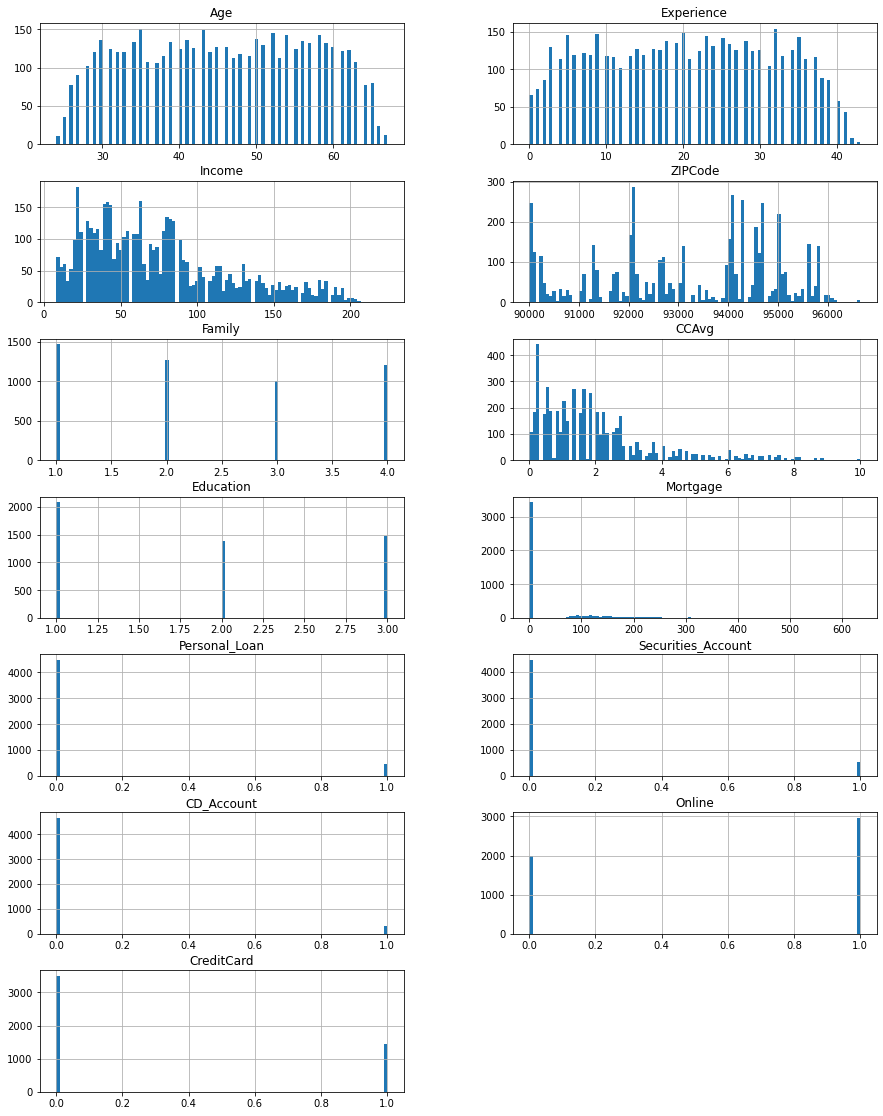

<IPython.core.display.Javascript object>

In [28]:
columns = list(df)
df[columns].hist(stacked=False, bins=100, figsize=(15, 40), layout=(14, 2))

In [29]:
X = df.drop("Personal_Loan", axis=1)
Y = df["Personal_Loan"]

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [30]:
print("Rows in train data:", X_train.shape[0])
print("Rows in test data:", X_test.shape[0])

Rows in train data: 3463
Rows in test data: 1485


<IPython.core.display.Javascript object>

In [31]:
print(f"The data set has: {data.shape[0]}, classes in total")
print("Classes in training set:")
print(y_train.value_counts())
print("Classes in test set:")
print(y_test.value_counts())

The data set has: 4948, classes in total
Classes in training set:
0    3112
1     351
Name: Personal_Loan, dtype: int64
Classes in test set:
0    1356
1     129
Name: Personal_Loan, dtype: int64


<IPython.core.display.Javascript object>

### EDA Insights: 
* Experience and Income should be two of our more important features
* Ages high correlation to Experience might be predictor
* Overall there are less correlations in the data set than i would have expected
* Mortgages might be a feature we can drop

## Logistic Regression

In [32]:
# Function to coputer performance metrics of a classification model

def model_performance_w_threshold(model, pred, target, threshold=0.5):
    pred_prob = model.predict_proba(pred)[:, 1]
    pred_thres = pred_prob > threshold
    prediction = np.round(pred_thres)

    accuracy = accuracy_score(target, prediction)  # to compute Accuracy
    recall = recall_score(target, prediction)  # to compute Recall
    precision = precision_score(target, prediction)  # to compute Precision
    f1 = f1_score(target, prediction)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [33]:
# Function to plot a confusion matrix of a classification model
def confusion_matrix_w_threshold(model, pred, target, threshold=0.5):
    prob = model.predict_proba(pred)[:, 1]
    thres = prob > threshold
    y_pred = np.round(thres)

    con_mat = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / con_mat.flatten().sum())
            ]
            for item in con_mat.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(con_mat, annot=labels, fmt="")
    plt.ylabel("True")
    plt.xlabel("Predicted")

<IPython.core.display.Javascript object>

In [34]:
X = df.drop("Personal_Loan", axis=1)
Y = df["Personal_Loan"]

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [35]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(solver="newton-cg", random_state=1)
logreg = model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

In [36]:
odds = logreg.coef_[0]
pd.DataFrame(odds, X_train.columns, columns=["coef"]).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
coef,-0.139332,0.143888,0.053177,-0.000102,0.70163,0.109287,1.711749,0.000984,-0.437318,3.101036,-0.71337,-0.902672


<IPython.core.display.Javascript object>

Coeffiecient Interpretations: 
* Expericence, Education, Income, CD_Account & CCAvg are postive an increase in these will make it more likely someone being more likely to take out a loan
* Age, Zip Code, Securities Account, Online & Credit Card are negative and make it less likely that someone will take out a personal loan

In [37]:
odds = np.exp(logreg.coef_[0])  # Turn coefficients into odds
perc = (np.exp(logreg.coef_[0]) - 1) * 100  # What is the % Change

pd.DataFrame({"Odds": odds, "Change %": perc}, index=X_train.columns).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Odds,0.869939,1.154755,1.054617,0.999898,2.017037,1.115483,5.538641,1.000984,0.645766,22.220954,0.489990,0.405485
Change %,-13.006115,15.475510,5.461662,-0.010212,101.703733,11.548269,453.864120,0.098448,-35.423414,2122.095377,-51.000994,-59.451523


<IPython.core.display.Javascript object>

Interpretations: 
* a single unit change in age will decrease the chances of someone taking out a loan by .87 times or 12.49%
* a single unit change in experience will increase the cahnce of someone taking out a loan by 1.14 times or 14.82%
* a single unit change in Income will increase the chances of someone taking out a loan by 1.05 times or 5.5%
* a single unit change in Family will increase the chances of someone taking out a loan by 2.02 times or 102.89%
* a single unit change in Education will increase the chances of someone taking out a loan by 5.5 times or 451.23% - we should focus here
* a single unit change in CD Account will lead to an increase chance someone takes out a loan by 26 times or 2500%, this is most likely an outlier in the data set

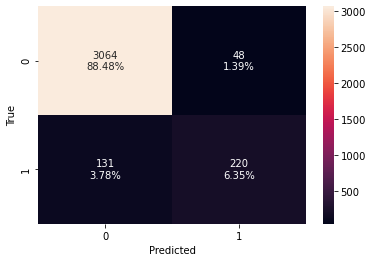

<IPython.core.display.Javascript object>

In [38]:
confusion_matrix_w_threshold(logreg, X_train, y_train)

In [39]:
# Checking model performance
log_reg_model_train_perf = model_performance_w_threshold(logreg, X_train, y_train)

print("Training Performance:")
log_reg_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.948311,0.626781,0.820896,0.710824


<IPython.core.display.Javascript object>

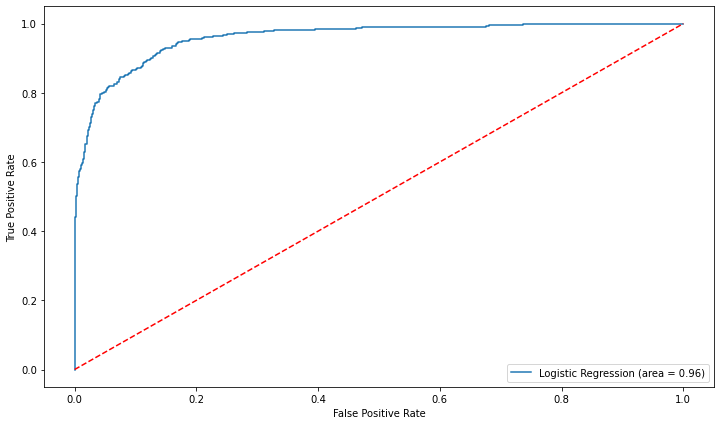

<IPython.core.display.Javascript object>

In [40]:
logit_roc_auc_train = roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [41]:
# Optimal threshold per the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:, 1])

opt_idx = np.argmax(tpr - fpr)
opt_ar_thres = thresholds[opt_idx]
print(opt_ar_thres)

0.07427614773486926


<IPython.core.display.Javascript object>

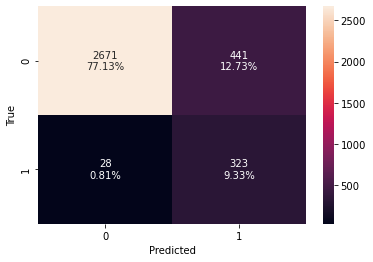

<IPython.core.display.Javascript object>

In [42]:
confusion_matrix_w_threshold(logreg, X_train, y_train, threshold=opt_ar_thres)

In [43]:
# Checking model performance
log_reg_model_train_perf = model_performance_w_threshold(
    logreg, X_train, y_train, threshold=opt_ar_thres
)

print("Training Performance:")
log_reg_model_train_perf

Training Performance:


,Accuracy,Recall,Precision,F1
0,0.864568,0.920228,0.422775,0.579372


<IPython.core.display.Javascript object>

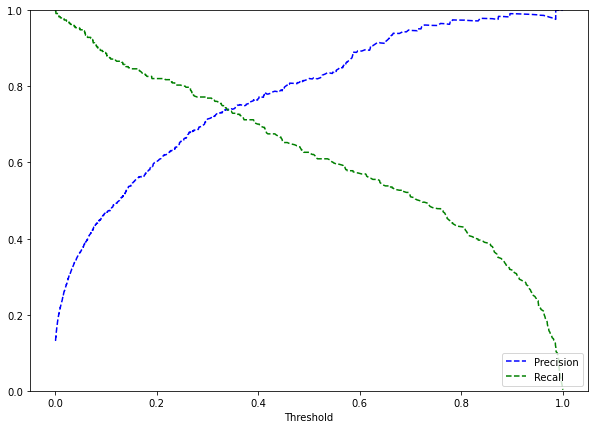

<IPython.core.display.Javascript object>

In [44]:
y_scores = logreg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def prec_recall_vs_tresh(precT, recalT, thresholds):
    plt.plot(thresholds, precT[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalT[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* a threshhold around 2.7 looks to provide better recall and good precision

In [45]:
# setting the threshold
opt_curve = 0.27

<IPython.core.display.Javascript object>

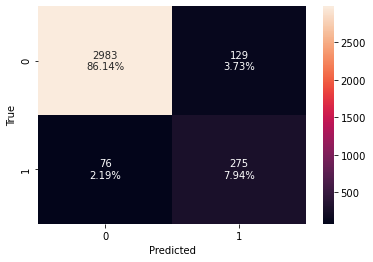

<IPython.core.display.Javascript object>

In [46]:
# creating confusion matrix
confusion_matrix_w_threshold(logreg, X_train, y_train, threshold=opt_curve)

In [47]:
# Checking model performance
log_reg_model_train_perf_threshold_curve = model_performance_w_threshold(
    logreg, X_train, y_train, threshold=opt_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.940803,0.783476,0.680693,0.728477


<IPython.core.display.Javascript object>

In [48]:
# training performance comparison

models_comp = pd.concat(
    [log_reg_model_train_perf.T, log_reg_model_train_perf_threshold_curve.T,], axis=1,
)
models_comp.columns = [
    "LR",
    "LR-0.27",
]

print("Training performance comparison, different thresholds:")
models_comp

Training performance comparison, different thresholds:


,LR,LR-0.27
Accuracy,0.864568,0.940803
Recall,0.920228,0.783476
Precision,0.422775,0.680693
F1,0.579372,0.728477


<IPython.core.display.Javascript object>

In [49]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.898643
1    0.101357
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.913131
1    0.086869
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### LR conclusion 
* by changing the threshold to .27 we are able to achieve a recall of .72 but have an accuracy of .94

## Building the decision Tree Model

In [50]:
# Check perfomance metrixs of a classification model
def class_mod_performance(model, pred, target):
    pred1 = model.predict(pred)

    acc = accuracy_score(target, pred1)  # to compute Accuracy
    recall = recall_score(target, pred1)  # to compute Recall
    precision = precision_score(target, pred1)  # to compute Precision
    f1 = f1_score(target, pred1)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [51]:
def confusion_matrix(model, predict, target):
    y_pred = model.predict(predict)
    con_mat = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            [
                "{0:0.0f}".format(item)
                + "\n{0:.2%}".format(item / con_mat.flatten().sum())
            ]
            for item in con_mat.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(con_mat, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [52]:
model1 = DecisionTreeClassifier(criterion="gini", random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [53]:
decision_tree_perf_train = class_mod_performance(model1, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [54]:
decision_tree_perf_test = class_mod_performance(model1, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.978451,0.844961,0.900826,0.872


<IPython.core.display.Javascript object>

In [55]:
## creating a list of column names
feat = X_train.columns.to_list()

<IPython.core.display.Javascript object>

In [56]:
print(tree.export_text(model1, feature_names=feat, show_weights=True))

|--- Income <= 114.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2482.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Income <= 110.50
|   |   |   |   |--- CCAvg <= 2.35
|   |   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- ZIPCode <= 94057.50
|   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- ZIPCode >  94057.50
|   |   |   |   |   |   |   |   |--- Experience <= 12.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Experience >  12.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- CCAvg >  2.35
|   |  

<IPython.core.display.Javascript object>

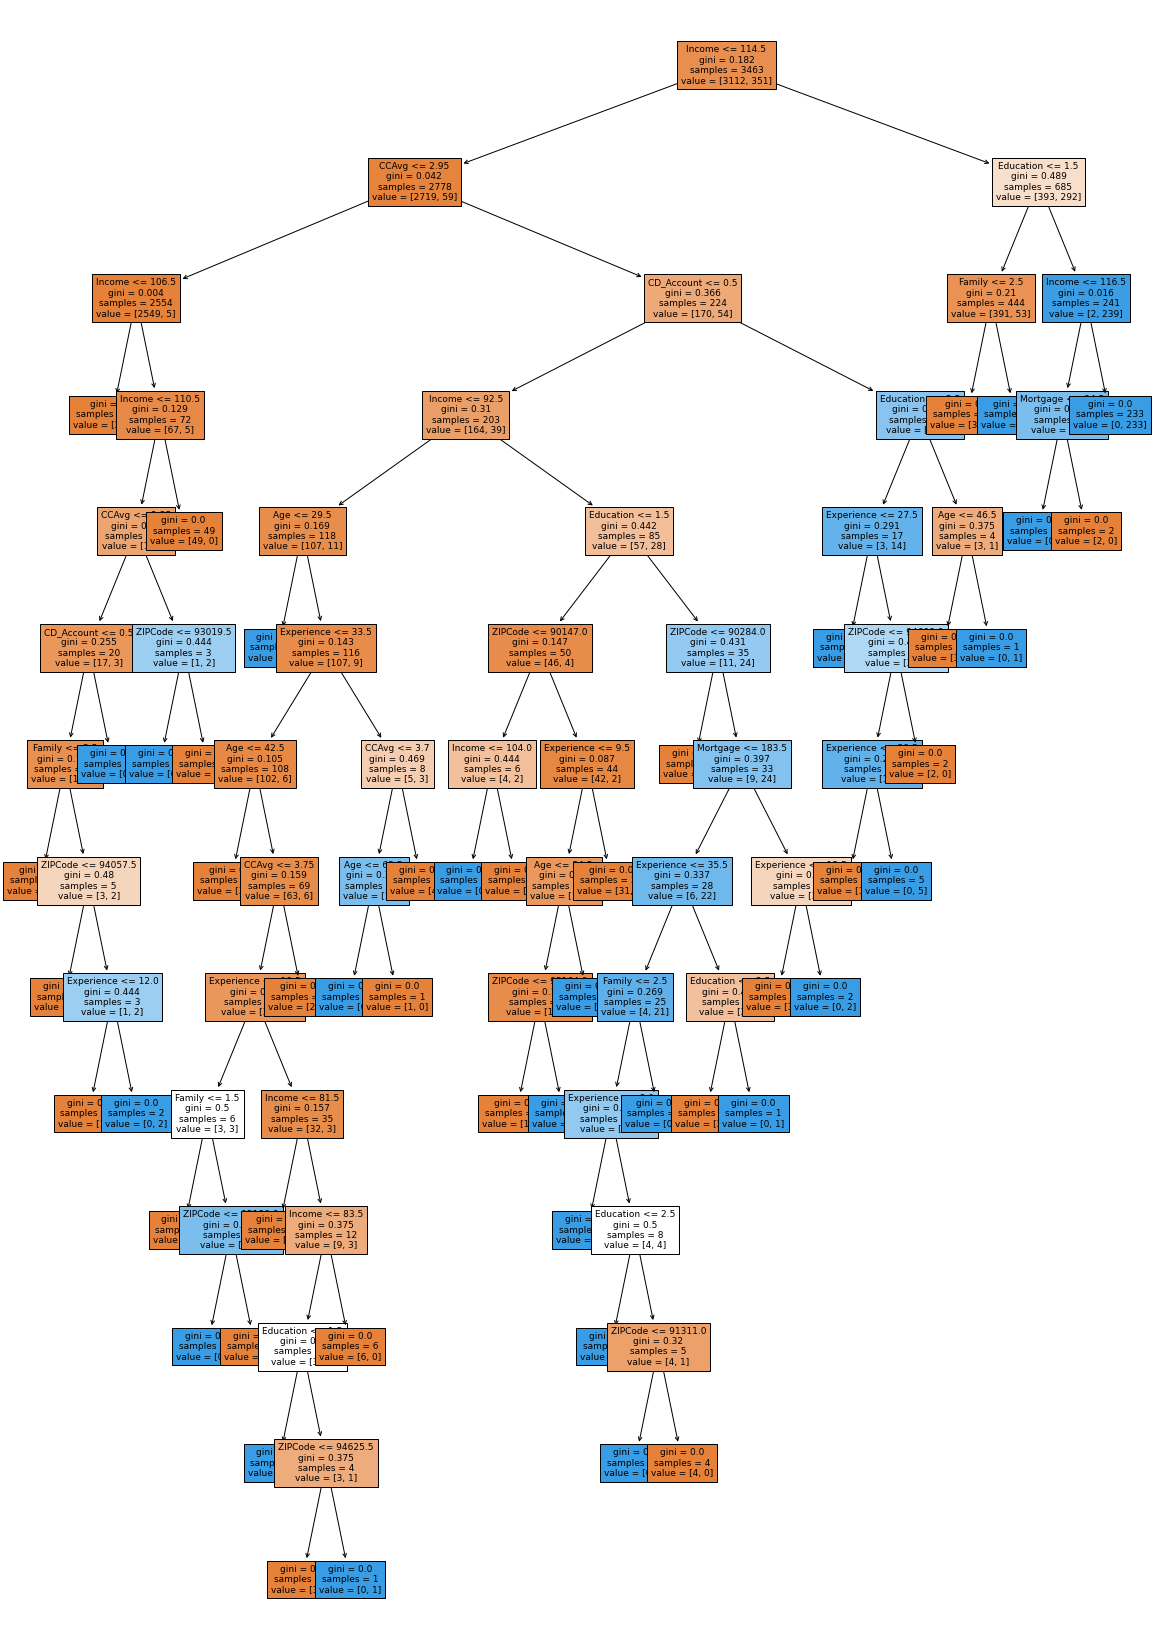

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model1,
    feature_names=feat,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
plt.show()

In [58]:
print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Education           0.412479
Income              0.307659
Family              0.154090
CCAvg               0.044233
ZIPCode             0.021854
Experience          0.020951
CD_Account          0.018862
Age                 0.013115
Mortgage            0.006757
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

In [59]:
est = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

scor = make_scorer(recall_score)

grid_obj = GridSearchCV(est, parameters, scoring=scor, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
est = grid_obj.best_estimator_

# Fit the best algorithm to the data.
est.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

In [60]:
decision_tree_perf_test = class_mod_performance(est, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97037,0.899225,0.789116,0.84058


<IPython.core.display.Javascript object>

In [61]:
decision_tree_perf_train = class_mod_performance(est, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.982096,0.988604,0.85679,0.917989


<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    est,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
plt.show()

NameError: name 'feature_names' is not defined

<Figure size 1080x720 with 0 Axes>

<IPython.core.display.Javascript object>

Performance metrixs are slight slower with the new tree but it is a signficantly pruned tree

In [ ]:
print(
    pd.DataFrame(
        est.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)